In [1]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sb

# Local Import
from pca import PCA

In [2]:
df = pd.read_csv("../data/48_Industry_Portfolios_daily.CSV", sep = ',')

# Build the Dataframe
df.rename(columns={"#,na_values =' NaN'": "date"},inplace=True)
df.columns = [column.strip() for column in df.columns]
df['date'] = pd.to_datetime(df['date'],format = '%Y%m%d')
df.set_index('date', inplace = True)
df = df/100
df.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,-0.0053,-0.0112,-0.0004,-0.0032,-0.0074,-0.0273,-0.0073,-0.0113,-0.0056,-0.0089,...,-0.0075,-0.0121,-0.0157,0.0008,-0.0096,-0.0053,-0.0057,-0.0108,-0.0060,-0.0026
2005-01-04,-0.0187,-0.0032,-0.0096,-0.0101,0.0056,-0.0076,-0.0137,-0.0038,-0.0113,-0.0137,...,-0.0180,-0.0217,-0.0184,-0.0113,-0.0041,-0.0104,-0.0048,-0.0167,-0.0151,-0.0134
2005-01-05,-0.0108,-0.0035,-0.0107,-0.0069,-0.0017,-0.0140,-0.0045,-0.0050,-0.0004,-0.0106,...,-0.0204,-0.0063,-0.0089,0.0000,-0.0095,-0.0036,0.0017,-0.0241,-0.0054,-0.0055
2005-01-06,-0.0006,0.0022,0.0083,0.0027,-0.0059,0.0044,0.0092,0.0070,0.0073,0.0042,...,0.0048,0.0028,0.0054,-0.0010,0.0102,0.0033,0.0047,0.0073,0.0127,0.0064
2005-01-07,-0.0054,0.0033,-0.0039,0.0027,0.0133,-0.0143,-0.0058,-0.0016,0.0069,-0.0006,...,-0.0079,-0.0050,-0.0066,-0.0003,-0.0022,-0.0065,-0.0040,0.0029,-0.0045,-0.0005


## Principal Component Analysis

In [6]:
# Set number of components
n_comp = 10

# PCA
pca = PCA(n_components=n_comp,standardized=False)
reduced_data = pca.transform(df)

## Plot Explained Variance (Eigenvalues) 


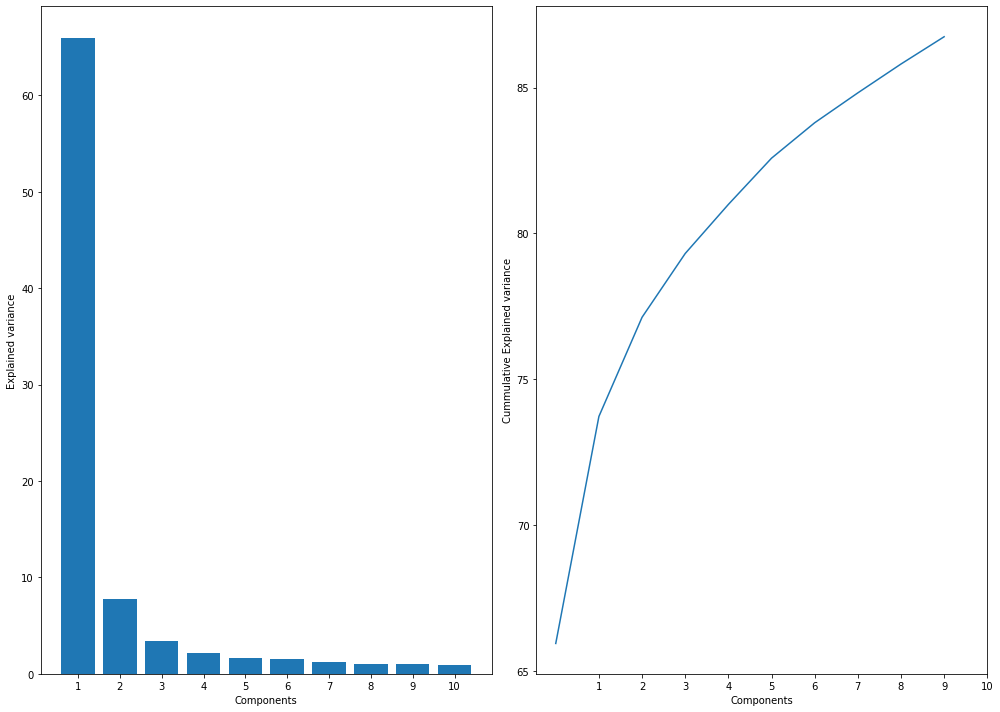

In [32]:
def plot_variance(pca):
    # Set up
    fig,ax = plt.subplots(1,2,figsize=(14,10))
    x = range(1,len(pca.eig_values)+1)

    # Plot Explained variance
    ax[0].bar(x, pca.explained_variance_ratio)
    ax[0].set_xticks(x)
    ax[0].set_xlabel('Components')
    ax[0].set_ylabel('Explained variance')


    # Plot Cummulative Explained variance
    ax[1].plot(np.cumsum(pca.explained_variance_ratio))
    ax[1].set_xticks(x)
    ax[1].set_xlabel('Components')
    ax[1].set_ylabel('Cummulative Explained variance')

    plt.tight_layout()
    plt.show()

plot_variance(pca)

 ## Plot Component (Eigenvectors)

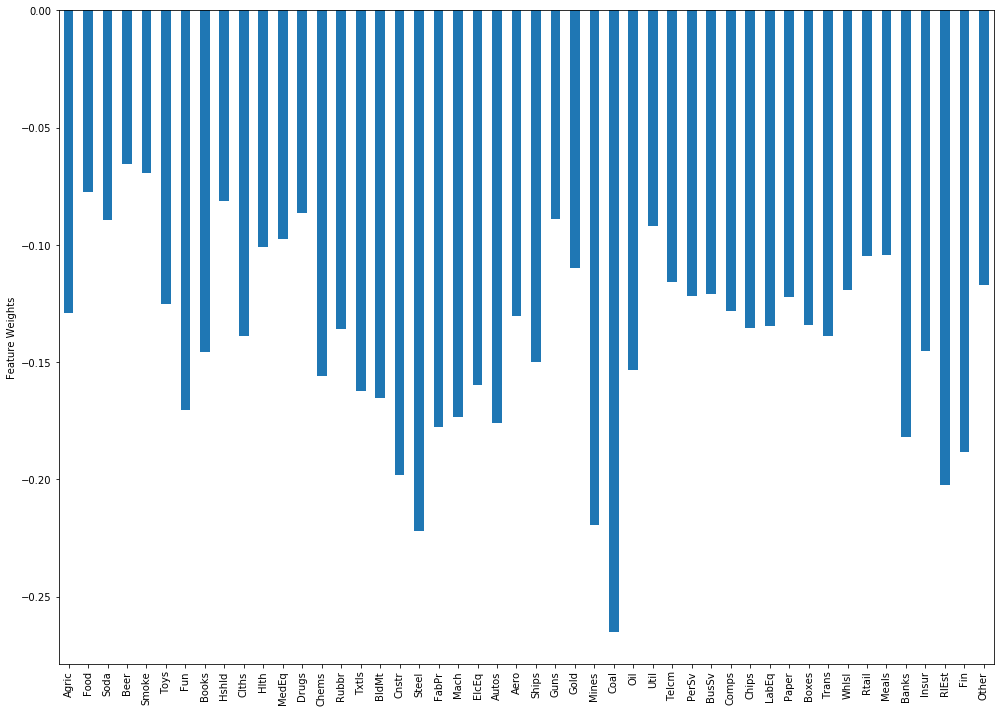

In [33]:
def plot_eigenvector(pca,k,labels):
    # PCA components
    components = pd.DataFrame(pca.eig_vec.T, columns = labels)

    # Plot the feature weights as a function of the sorted components
    fig, ax = plt.subplots(figsize=(14,10))
    components.iloc[k].plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights")
    plt.tight_layout()
    plt.show()

# Choose which Eigenvector to plot 
k = 0
plot_eigenvector(pca,k=0,labels=df.keys())

## Effect of features on each components


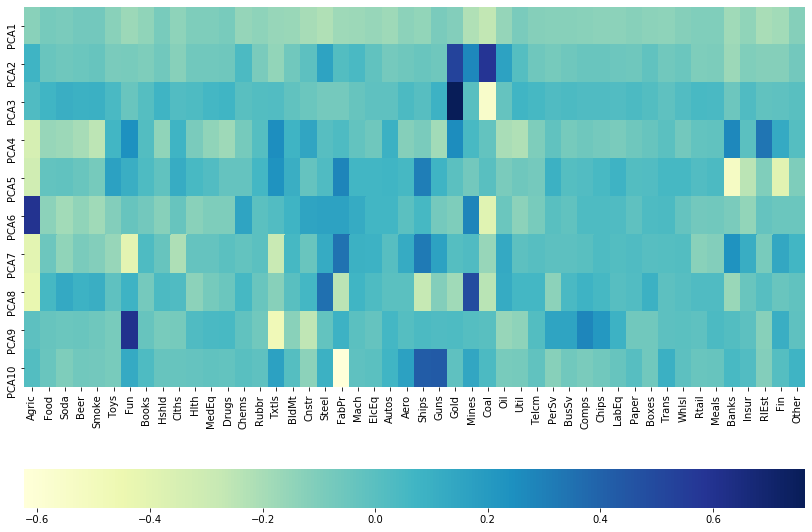

In [34]:
def pca_heatmap(pca):
    fig,ax = plt.subplots(figsize=(14,10))
    sb.heatmap(pca.eig_vec.T,
                    cmap='YlGnBu',
                    yticklabels=[ "PCA"+str(x) for x in range(1,len(pca.eig_values)+1)],
                    xticklabels= df.keys(),
                    cbar_kws={"orientation": "horizontal"},
                    ax = ax)

pca_heatmap(pca)

##  Plot PCA result combined

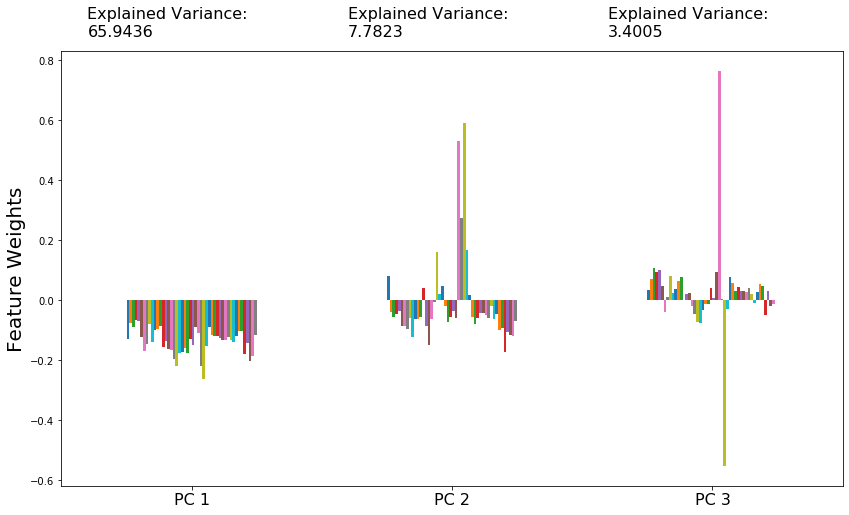

In [35]:
def plot_pca_results(pca,n_comp, label):
    eig_val = pca.eig_values[:n_comp]
    eig_vec = pca.eig_vec[:,:n_comp]
    variance_ratio = pca.explained_variance_ratio[:n_comp]

    # Index Principal Components
    PC_index = [f'PC {i}'for i in range(1,len(eig_val)+1)]

    # PCA components
    components = pd.DataFrame(eig_vec.T, columns = label)
    components.index = PC_index

    # Initialize a Plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a bar plot for each component
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights",fontsize = 20)
    ax.set_xticklabels(PC_index,rotation = 0,fontsize = 16)
    ax.get_legend().remove()


    # Display the explained variance ratios
    for i, ev in enumerate(variance_ratio):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, f"Explained Variance:\n{ev:.4f}",fontsize = 16)
    plt.show()

plot_pca_results(pca=pca, n_comp=3, label = df.keys())

## Biplot

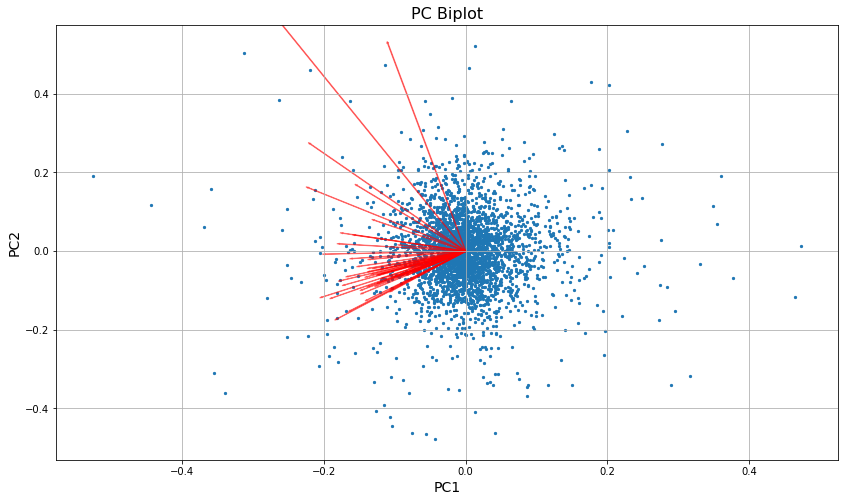

In [22]:
def biplot(reduced_data, PC = (0,1), label=None):
    eig_vec = pca.eig_vec[:,PC]

    x = reduced_data[:,PC[0]]
    y = reduced_data[:,PC[1]]
    scalex = 1.0/(x.max() - x.min())
    scaley = 1.0/(y.max() - y.min())

    fig, ax = plt.subplots(figsize = (14,8))
    ax.scatter(x * scalex,y * scaley,s=5)

    for i in range(eig_vec.shape[0]):
        ax.arrow(0, 0, eig_vec[i,0], eig_vec[i,1], color='r', alpha=0.5)
        if label is not None:
            ax.text(eig_vec[i,0]*1.5, eig_vec[i,1]*1.5, label[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_title("PC Biplot", fontsize=16)
    ax.set_xlabel(f"PC{PC[0]+1}", fontsize=14)
    ax.set_ylabel(f"PC{PC[1]+1}", fontsize=14)
    ax.grid()

biplot(reduced_data, PC = (0,1))
# biplot(reduced_data, PC = (0,1),label=df.keys())